In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#予測銘柄ﾘｽﾄ
brand_list = [
    4502,#武田薬品工業
    #5401,#新日鉄住金
    #5406,#神戸製鋼
    #5411,#JFEﾎｰﾙﾃﾞｨﾝｸﾞｽ
    #5711,#三菱ﾏﾃﾘｱﾙ
    #7201,#日産自動車
    #7203,#ﾄﾖﾀ自動車
    #7269,#ｽｽﾞｷ
    #7751,#キヤノン
    #8604,#野村ﾎｰﾙﾃﾞｨﾝｸﾞｽ
]
etf_list=[
    #1309,#上海株式指数・上証50連動型上場投資信託 
    1321,#日経225連動型上場投資信託
    #1326,#SPDRｺﾞｰﾙﾄﾞ・ｼｪｱ
    #1343,#NEXT FUNDS 東証REIT指数連動型上場投信
    #1549,#上場ｲﾝﾃﾞｯｸｽﾌｧﾝﾄﾞNifty50先物(ｲﾝﾄﾞ株式)
    #1551,#JASDAQ-TOP20上場投信
    1623,#鉄鋼･非鉄上場投信
    #1678,#NEXT FUNDSｲﾝﾄﾞ株式指数・Nifty50連動型上場投信
    #1681,#上場ｲﾝﾃﾞｯｸｽﾌｧﾝﾄﾞ海外新興国株式(MSCIｴﾏｰｼﾞﾝｸﾞ)
    1682,#NEXT FUNDS 日経・東商取白金指数連動型上場投信
    #1698,#上場インデックスファンド日本高配当（東証配当フォーカス100）
]
#説明変数ﾘｽﾄ
xlist = [
    #"diff_1309",
    "diff_1321",
    #"diff_1326",
    #"diff_1343",
    #"diff_1549",
    #"diff_1551",
    "diff_1623",
    #"diff_1678",
    #"diff_1681",
    "diff_1682",
    #"diff_1698",
]

num_brand = 8604
#ﾌｧｲﾙ読み込み
df = pd.read_csv(filepath_or_buffer=str(num_brand)+".csv",
                        encoding="shift_jis", sep=",")
df.columns = ["Date", "Open", "High", "Low", "Close", "Volume", "Close2"]
df["index"] = [i for i in range(len(df))]

k=0

for etf in etf_list:
    df_etf = pd.read_csv(filepath_or_buffer=str(etf)+".csv",
                        encoding="shift_jis", sep=",")
    df_etf.columns = ["Date", "Open", "High", "Low", "Close", "Volume", "Close2"]

    dates_etf = []
    dates = []
    closeis = []
    opens =[]
    k=0

    #包含条件を使うためにわざわざｺﾋﾟｰ
    for i in range(len(df.Date)):
        dates.append(df.Date[i])
        if i<len(df_etf.Date):
            dates_etf.append(df_etf.Date[i])
            closeis.append(df_etf.Close[i])
            opens.append(df_etf.Open[i])
        else:
            dates_etf.append(0)
            closeis.append(0)
            opens.append(0)

    for i in range(len(dates)):
        if dates[i] in dates_etf:
            #print(1)
            pass
        else:
            #print(0)
            closeis[i+1:len(df_etf.Close)+1+k] = closeis[i:len(df_etf.Close)+k]
            closeis[i] = closeis[i-1]
            opens[i+1:len(df_etf.Open)+1+k] = opens[i:len(df_etf.Open)+k]
            opens[i] = opens[i-1]
            k=k+1

    #print(closeis)
    #print(len(closeis))

    df_etf2 = pd.DataFrame({"Date_" + str(etf) : dates, "Close_" + str(etf):closeis, "Open_" + str(etf):opens})

    df = pd.concat([df, df_etf2], axis = 1)

    df["diff_"+str(etf)] = df["Open_"+str(etf)]-df["Close_" + str(etf)].shift(+1)

df.to_csv("stock_price_JFE_merged.csv")

from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv(filepath_or_buffer="stock_price_JFE_merged.csv", sep=",")

#Model Fitting

#検証ﾃﾞｰﾀ数
MM=100
M=30
LN=MM/M
LN = 1

#ﾃｽﾄﾃﾞｰﾀとﾄﾚｰﾆﾝｸﾞﾃﾞｰﾀの分割(M:N-M)
df_train = df.iloc[1:len(df)-MM]


x_train = []
y_train = []

"""
for s in range(0,len(df_train)-1):

    x_train.append(df_train[xlist].iloc[s])

    if df_train["Close"].iloc[s+1] > df_train["Close"].iloc[s]:
        y_train.append(1)
    else:
        y_train.append(-1)
"""

xlist = [
    'Open',
    'Open_1321',
    'Open_1623',
    'Open_1682'
]

for s in range(0,len(df_train)):
    x_train.append(df_train[xlist].iloc[s])
    y_train.append(df_train["Close"].iloc[s])

#ﾓﾃﾞﾙﾌｨｯﾃｨﾝｸﾞ
#print(x_train)
print("Starting model fitting")
rf = RandomForestRegressor(n_estimators = len(x_train), random_state=0)
rf.fit(x_train, y_train)
print("Finishing model fitting")

FileNotFoundError: File b'8604.csv' does not exist

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':


100


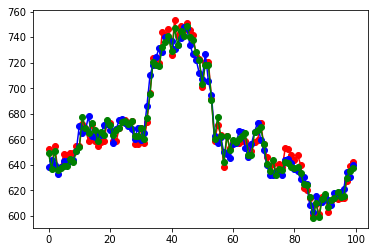

100


In [11]:
import numpy as np

k=0
    
df_test = df.iloc[len(df)-MM+M*k:len(df)]

#print(df_test.Date)
test_y=[]

for i in range(0,len(df_test)):
    test_x = df_test[xlist].iloc[i]
    test_y.append(rf.predict(test_x.reshape(1,-1)))

print(len(test_y))

#ﾓﾃﾞﾙ検証
up_down_fbk = []
score = 0

x = [_x for _x in range(len(test_y))]

plt.plot(x,test_y,'-o',color = 'red')
plt.plot(x,df.Close[len(df)-MM:len(df)],'-o',color = 'blue')
plt.plot(x,df.Open[len(df)-MM:len(df)],'-o', color = 'green')

plt.show()
print(len(df.Close[len(df)-MM:len(df)]))

from sklearn import tree

#for i in enumerate(rf.estimators_):
i=1
tree.export_graphviz(rf.estimators_[i], out_file = 'tree_%d.dot'%i)

In [15]:
import pydotplus
from IPython.display import Image
 
graph = pydotplus.graphviz.graph_from_dot_file('tree_1.dot')
graph.write_png('tree_1.png')
Image(graph.create_png())
print(1)
!dot -T png tree_1.dot > tree_1.png
print(2)
Image('tree_1.png')

InvocationException: GraphViz's executables not found

In [ ]:
for i in range(len(x)):
    if df.Close[len(df)-MM+i]>df.Open[len(df)-MM+i] and test_y[i]>df.Open[len(df)-MM+i]:
        score = score + 1
    elif df.Close[len(df)-MM+i]<df.Open[len(df)-MM+i] and test_y[i]<df.Open[len(df)-MM+i]:
        score = score + 1
    else:
        pass
score = score / len(x) * 100

print(score)